 # Домашнє завдання №3

In [1]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

## Читаємо датасет

In [59]:
df = pd.read_csv("Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [124]:
df["price"].describe().round(2)

count         545.00
mean      4766729.25
std       1870439.62
min       1750000.00
25%       3430000.00
50%       4340000.00
75%       5740000.00
max      13300000.00
Name: price, dtype: float64

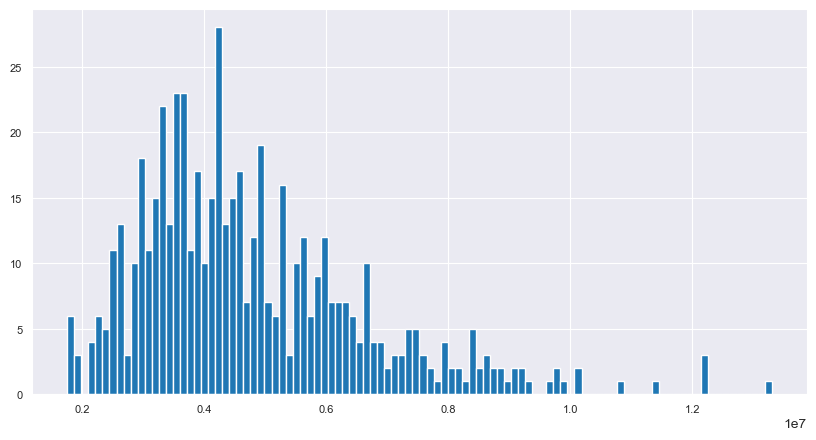

In [133]:
hist = df["price"].hist(bins=100, figsize=(10, 5), xlabelsize=8, ylabelsize=8)

## Формуємо вектори ознак X та вектор результатів y

In [60]:
from sklearn.model_selection import train_test_split

X = df[["area", "bedrooms", "bathrooms"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


## Нормалізуємо X_train та X_test за допомогою MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Напишіть функцію гіпотези лінійної регресії у векторному вигляді


In [62]:
def hypothesis(X, w):
    return np.dot(X, w)

# Створіть функцію для обчислення функції втрат у векторному вигляді

In [85]:
def loss(X, w, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X)) if X.shape[1] < len(w) else X
    hyp = hypothesis(X, w)
    return np.mean((hyp - y) ** 2)

## Реалізуйте один крок градієнтного спуску

In [89]:
def gradient_descent_step(X, w, y, learning_rate):
    grad = np.dot(X.T, (hypothesis(X, w) - y)) / y.shape[0]
    w = w - learning_rate * grad
    return w
    

## Знайдіть найкращі параметри W для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [162]:
def gradient_descent(X, y, learning_rate, num_iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1])
    w_dict = dict()
    for i in range(num_iterations):
        w = gradient_descent_step(X, w, y, learning_rate)
        loss_i = loss(X, w, y)
        w_dict[loss_i] = w
        if i % 100 == 0:
            print(f" step: {i} loss: {np.sqrt(loss_i).round(2)} bias: {w[0].round(2)} w: {w[1:].round(2)}")
    return w_dict[min(w_dict.keys())]



In [180]:
W = gradient_descent(X_train, y_train, 0.1, 4000)
print(f"\nbias: {W[0]} \nw1: {W[1]} \nw2: {W[2]} \nw3: {W[3]}")

 step: 0 loss: 4472410.83 bias: 470653.59 w: [127534.67 194118.25  56602.55]
 step: 100 loss: 1445099.09 bias: 3449791.57 w: [1854812.37 1849455.53 1373135.82]
 step: 200 loss: 1364153.33 bias: 3139862.41 w: [2540808.69 2028000.27 2102401.77]
 step: 300 loss: 1316752.28 bias: 2916638.73 w: [3073761.83 2130017.42 2638611.07]
 step: 400 loss: 1289211.44 bias: 2756454.0 w: [3488994.24 2180517.35 3033920.12]
 step: 500 loss: 1273198.54 bias: 2642040.0 w: [3813398.98 2197062.11 3326299.09]
 step: 600 loss: 1263823.77 bias: 2560805.64 w: [4067513.36 2191893.58 3543395.46]
 step: 700 loss: 1258273.45 bias: 2503574.81 w: [4267068.72 2173465.09 3705345.79]
 step: 800 loss: 1254940.7 bias: 2463664.51 w: [4424151.97 2147543.29 3826822.04]
 step: 900 loss: 1252907.36 bias: 2436211.69 w: [4548078.45 2117999.09 3918520.51]
 step: 1000 loss: 1251645.62 bias: 2417681.48 w: [4646049.53 2087374.01 3988245.12]
 step: 1100 loss: 1250849.08 bias: 2405508.07 w: [4723649.19 2057284.59 4041695.31]
 step: 1200

## знайдіть ці ж параметри за допомогою аналітичного рішення

In [181]:
def analytical_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return w


W_analytical = analytical_solution(X_train, y_train)
print(W_analytical)


[2412022.52794476 5026538.59470926 1800988.25228755 4266958.97292422]


## порівняйте отримані результати

In [199]:
print(f"bias \nmodel: {W[0]} \nanalytical: {W_analytical[0]}")
for i, (a, b) in enumerate(zip(W[1:], W_analytical[1:])):
    print(f"\nw{i+1} \nmodel: {a:>22} \nanalytical: {b:<20}")


bias 
model: 2410491.409569671 
analytical: 2412022.5279447623

w1 
model:       5026425.03396187 
analytical: 5026538.594709262   

w2 
model:      1805684.793285566 
analytical: 1800988.2522875518  

w3 
model:      4263560.615298646 
analytical: 4266958.972924221   
